Observations: 

1. There was almost equal amounts of male and female mice 
2. The correlation between average tumor volume and mouse weight is 0.84. This is a positive correlation, when the mouse weight increases the average tumor volume also increases.
3. The total number of mice was 249 and the total after removing duplicates was 248. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#merge both files
data_complete = pd.merge(mouse_metadata, study_results)


In [2]:
#test file merge
data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#check number of mice 

mouse_number = data_complete["Mouse ID"].nunique()
mouse_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_complete.loc[data_complete.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_dataframe = data_complete[data_complete["Mouse ID"] != "g989"]
clean_dataframe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_dataframe["Mouse ID"].nunique()
mice_count

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [8]:
drug_regimen = clean_dataframe.groupby(["Drug Regimen"])

In [9]:
tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()
tumor_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_standard = drug_regimen["Tumor Volume (mm3)"].std()
tumor_standard

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_sem = drug_regimen["Tumor Volume (mm3)"].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
summary_dataframe = pd.DataFrame({
    "Mean":tumor_mean,
    "Median":tumor_median,
    "Variance":tumor_variance,
    "Standard Deviation":tumor_standard,
    "SEM":tumor_sem})

In [15]:
summary_dataframe[["Mean","Median","Variance","Standard Deviation","SEM"]]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = clean_dataframe.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = clean_dataframe["Timepoint"].value_counts()
timepoints


0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

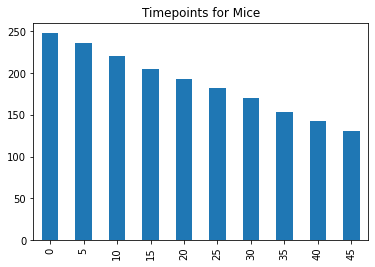

In [32]:
#pandas bar plot

pandas_bar = timepoints.plot.bar("Timepoint", "Drug Regimen")

plt.title("Timepoints for Mice")
plt.show ()


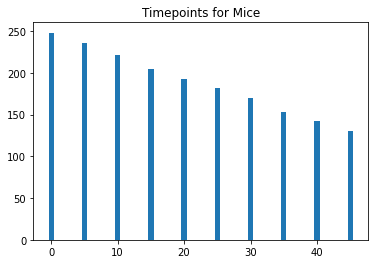

In [33]:
#pyplot 

x_axis = timepoints.index.values
y_axis = timepoints.values

plt.bar(x_axis, y_axis)
plt.title("Timepoints for Mice")
plt.show()

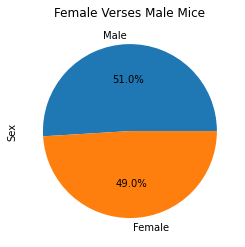

In [34]:
#pie plot using pandas showing distribution of female vs male mice 

femalevsmale_data = clean_dataframe["Sex"].value_counts()

plt.title("Female Verses Male Mice")

femalevsmale_data.plot.pie(autopct="%1.1f%%")
plt.show()


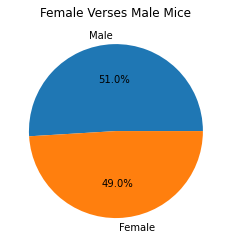

In [35]:
#pie plot using pyplot showing distribution of female vs male mice

femalevsmale_data = clean_dataframe["Sex"].value_counts()
labels = femalevsmale_data.index
sizes = femalevsmale_data.values
plt.title("Female Verses Male Mice")
plt.pie(sizes, labels = labels, autopct = "%1.1f%%")
plt.show()


In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [37]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin"]
line_plot


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


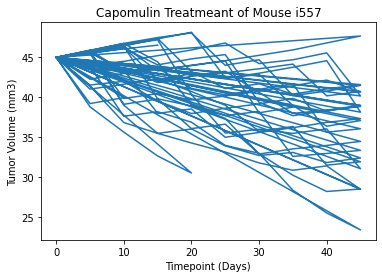

In [40]:
x_axis_tp = line_plot["Timepoint"]
tumor_vol = line_plot["Tumor Volume (mm3)"]

plt.plot(x_axis_tp, tumor_vol)
plt.title('Capomulin Treatmeant of Mouse i557')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

weight_df = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin"]
weight_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


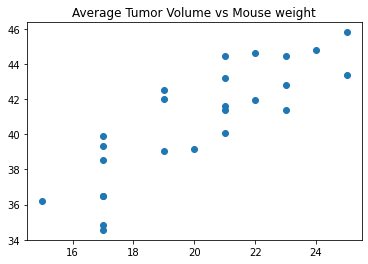

In [42]:
tumor_average = weight_df.groupby(["Mouse ID"]).mean()
plt.scatter(tumor_average["Weight (g)"],tumor_average["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse weight")
plt.show()

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_coefficient = st.pearsonr(tumor_average['Weight (g)'],tumor_average['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume for the Capomulin Regimen is {round(correlation_coefficient[0],2)}")



The correlation between mouse weight and the average tumor volume for the Capomulin Regimen is 0.84
